#### Introduction to Statistical Learning, Lab 4.4

# Quadratic Discriminant Analysis


We will now perform a quadratic discriminant analysis (QDA) non the `Smarket` data set, trying to predict `Direction` using `Lag1` and `Lag2`. We again use the `sklearn` library.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from islpy import datasets, utils, lmplots
sns.set()
%matplotlib inline

We first load the data set.

In [2]:
smarket = datasets.Smarket()
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


We use the observations before 2005 as the training sample and the later predictions as the test sample.

In [3]:
X_train = smarket[smarket.Year < 2005][['Lag1', 'Lag2']]
Y_train = smarket[smarket.Year < 2005]['Direction']
X_test = smarket[smarket.Year == 2005][['Lag1', 'Lag2']]
Y_test = smarket[smarket.Year == 2005]['Direction']
X_test.head()

,Lag1,Lag2
998,-0.134,0.008
999,-0.812,-0.134
1000,-1.167,-0.812
1001,-0.363,-1.167
1002,0.351,-0.363


We perform an QDA fit on the training data set.

In [4]:
qda = QuadraticDiscriminantAnalysis()
qda_fit = qda.fit(X_train, Y_train)

In [5]:
print(qda.priors_)

[0.49198397 0.50801603]


This output indicates that $\hat{\pi}_1 = 0.492$ and $\hat{\pi}_2 = 0.508$. That is, 49.2% of the training observations correspond to days when the marked went down.  

In [6]:
means = pd.DataFrame(qda_fit.means_, index=('Down', 'UP'), columns=('Lag1', 'Lag2'))
means

,Lag1,Lag2
Down,0.042790,0.033894
UP,-0.039546,-0.031325


The reported *means* are the average of each predictor in each class.

We can read off the relation of the predictors to the market direction.

We now check the performance of the classifier on the test data set.

In [7]:
pred = qda_fit.predict(X_test)
confusion_matrix(pred, Y_test)

array([[ 30,  20],
       [ 81, 121]])

In [8]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

        Down       0.60      0.27      0.37       111
          Up       0.60      0.86      0.71       141

    accuracy                           0.60       252
   macro avg       0.60      0.56      0.54       252
weighted avg       0.60      0.60      0.56       252



It is interesting that the QDA predictions are correct 60% of the time. This seems quite good for a notoriously difficult problem. The QDA seems to capture the features in the data quite well, but don't bet you money on it.

We showcase the same type of plots as in the previous lab, this time using the test data set.

The `utils` module from the `isply` library provides some utility functions to plot decision contours and boundaries.

They require a callable (function, method) that properly determines the probabilities for the two dimensional range specified by two predictor arrays. They only work out of the box when the model has exactly the predictors specified. Otherwise users have to supply a callable that properly marginalises the other predictors.

Let's first overlay the $P=0.5$ decision contour on a scatter plot. This is the default behaviour of `utils.plot_decision_contour()`.

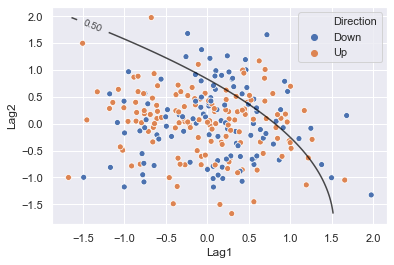

In [9]:
ax = sns.scatterplot(x=X_test['Lag1'], y=X_test['Lag2'], hue=Y_test)
ax = utils.plot_decision_contour(X_test['Lag1'], X_test['Lag2'],
                                 qda_fit.predict_proba, ax=ax)

We can also overlay more contours by specifying the `levels` keyword argument. A value of `None` uses the automatic configuration from `matplotlib`'s `contour()` function.

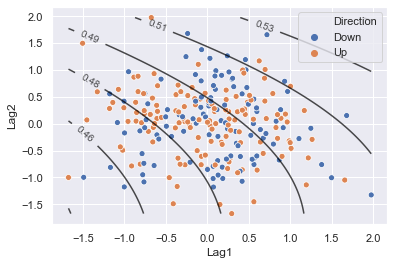

In [10]:
ax = sns.scatterplot(x=X_test['Lag1'], y=X_test['Lag2'], hue=Y_test)
ax = utils.plot_decision_contour(X_test['Lag1'], X_test['Lag2'],
                                 qda_fit.predict_proba, ax=ax, 
                                 levels=None)

We can choose the category (class) the probabilities refer to (default: $0$). Note the change in the contour annotations, they are now reversed.

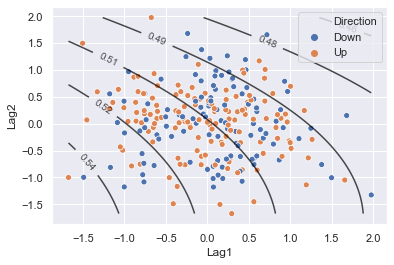

In [11]:
ax = sns.scatterplot(x=X_test['Lag1'], y=X_test['Lag2'], hue=Y_test)
ax = utils.plot_decision_contour(X_test['Lag1'], X_test['Lag2'],
                                 qda_fit.predict_proba, ax=ax, 
                                 levels=None, category=1)

The `plot_decision_boundaries()` function identifies the areas where a particular class probability is highest and overlays a coloured shade accordingly. This function works out of the box for multiple *response* classes. But the marginalisation restriction applies if there are more than two *predictors*.  

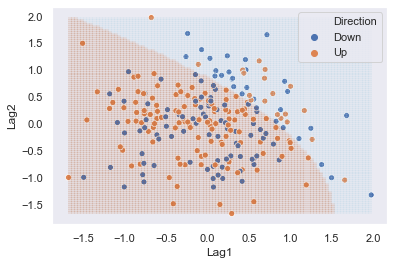

In [12]:
ax = sns.scatterplot(x=X_test['Lag1'], y=X_test['Lag2'], hue=Y_test)
ax = utils.plot_decision_boundaries(X_test['Lag1'], X_test['Lag2'],
                                   qda_fit.predict_proba, ax=ax)

We can also combine the two.

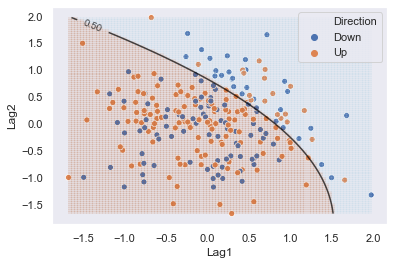

In [13]:
ax = sns.scatterplot(x=X_test['Lag1'], y=X_test['Lag2'], hue=Y_test)
ax = utils.plot_decision_contour(X_test['Lag1'], X_test['Lag2'],
                                 qda_fit.predict_proba, ax=ax)
ax = utils.plot_decision_boundaries(X_test['Lag1'], X_test['Lag2'],
                                   qda_fit.predict_proba, ax=ax)